# Solutions

## Setup

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [2]:
import os
from pathlib import Path
from openai import OpenAI
import IPython.display as ipd

os.environ['OPENAI_API_KEY'] = 'COPY THE API_KEY HERE'

client = OpenAI()

## 1. Translation and Explanation Using OpenAI Chat Completions API

In [3]:
originalText = '白日依山尽，黃河入海流；欲穷千里目，更上一层楼。'

In [4]:
## use Chat Completions API to translate the poem
def translateFromChineseToEnglish(text):
  response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a poem in Chinese, and your task is to translate it into English."
    },
    {
      "role": "user",
      "content": text
    }
  ],
  temperature=0.7,
  max_tokens=64
  )
  return response.choices[0].message.content


In [5]:
## use Chat Completions API to explain the meaning of the poem
def explainMeaning(text):
  response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "system",
      "content": "You will be provided the English translation of a Chinese poem. Explain the meaning of the poem in no more than 50 words."
    },
    {
      "role": "user",
      "content": text
    }
  ],
  temperature=0.7,
  max_tokens=64
  )
  return response.choices[0].message.content

In [6]:
translatedText = translateFromChineseToEnglish(originalText)

explainedText = explainMeaning(translatedText)

print(translatedText)

print(explainedText)

The sun sets behind the mountains, the Yellow River flows into the sea;
To enjoy a grander sight, climb to a greater height.
The poem expresses the idea that one must strive for higher goals to achieve a broader perspective and greater accomplishments, symbolized by the grand sights of nature.


## 2. Speech Generation Using OpenAI Audio API

In [7]:
## use Audio API to generate text to speech
def generateTextToSpeech(text):
  speech_file_path = "speech.mp3"
  response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input=text
  )
  response.stream_to_file(speech_file_path)
  return speech_file_path

In [8]:
fileName=generateTextToSpeech(originalText + explainedText)
ipd.Audio(filename=fileName)

<ipython-input-7-4170eec5d524>:9: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


## 3. Image Generation Using OpenAI Images API

In [9]:
## use the Images API with dall-e-3 to generate an image based on the poem
def generateImage(prompt):
  response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    size="1024x1024",
    quality="standard",
    n=1,
  )

  return response.data[0].url

In [10]:
poem_Image_Uri = generateImage(translatedText)

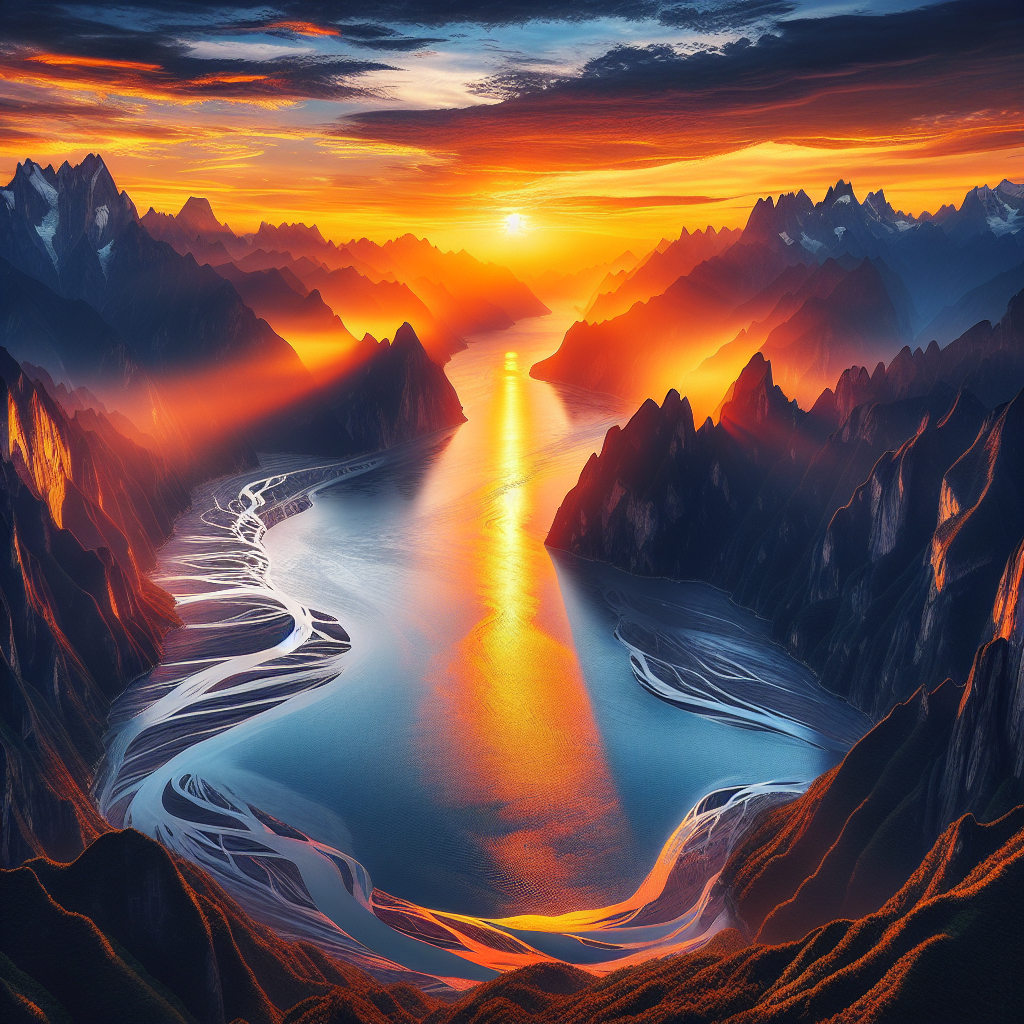

In [11]:
# Open the image given its URL
from PIL import Image
import urllib.request

with urllib.request.urlopen(poem_Image_Uri) as url:
    img=Image.open(url)
    display(img)